In [2]:
import csv

import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import csv
from scipy.stats import norm
import seaborn as sns 
import altair as alt   

def channel_to_energy(channel, slope, intercept):
    # Convert channel number to energy using calibration constants
    return slope * channel + intercept

def convert_spe_to_csv(spe_file_path, slope, y_intercept):
    # Initialize lists to hold the data
    indices = []
    counts = []
    
    # Read the .Spe file content
    with open(spe_file_path, 'r') as file:
        content = file.readlines()
    
    # Flags to identify when the data section starts and when actual data starts
    data_section = False
    data_started = False
    
    for line in content:
        if line.startswith('$ROI:'):
            break  # Stop reading if we reach the $ROI: section
        if data_section and data_started:
            counts.append(int(line.strip()))  # Append count after stripping whitespace
            indices.append(len(counts))  # The index is simply the count of how many data points have been read
        if line.startswith('$DATA:'):
            data_section = True  # Set the flag to True, next lines will be data
        elif data_section and not data_started:
            data_started = True  # Skip the first line after $DATA:
    
    # Calculate the energy for each channel
    energies = [channel_to_energy(channel, slope, y_intercept) for channel in indices]
    
    # Define the CSV file path based on the .Spe file path
    csv_file_path = spe_file_path.replace('.Spe', '_with_energy.csv')
    
    # Writing the data along with the calculated energies to the CSV file
    with open(csv_file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Time', 'Count', 'Energy (keV)'])  # Writing the header
        writer.writerows(zip(indices, counts, energies))  # Writing the actual data
    
    return csv_file_path


CSV file created at: ./02-06-2024_Na22_measurement_01_with_energy.csv


In [53]:
# Replace with your .Spe file path
spe_file_path1 = './Lab 2 Data/02-06-2024_Na22_measurement_01.Spe'

spe_file_path2 = './Lab 2 Data/02-08-2024_Co60_measurement_01.Spe'

spe_file_path3 = './Lab 2 Data/02-08-2024_Ca137_measurement_01.Spe'

# Calibration constants obtained previously for Na22
slope = 0.3014996053670087
y_intercept = -1109.560378847672

# Calling the function to convert .Spe to CSV for Na22
csv_file = convert_spe_to_csv(spe_file_path1, slope, y_intercept)
print(f"CSV file created at: {csv_file}")

# Calibration constants obtained previously for Co60 and for Ca137
slope =  0.287002
y_intercept = -848.529724

# Calling the function to convert .Spe to CSV for Co60 
csv_file = convert_spe_to_csv(spe_file_path2, slope, y_intercept)
print(f"CSV file created at: {csv_file}")


# Calling the function to convert .Spe to CSV for Co60 
csv_file = convert_spe_to_csv(spe_file_path3, slope, y_intercept)
print(f"CSV file created at: {csv_file}")

CSV file created at: ./Lab 2 Data/02-06-2024_Na22_measurement_01_with_energy.csv
CSV file created at: ./Lab 2 Data/02-08-2024_Co60_measurement_01_with_energy.csv
CSV file created at: ./Lab 2 Data/02-08-2024_Ca137_measurement_01_with_energy.csv


In [54]:
Na22_data = pd.read_csv("./Lab 2 Data/02-06-2024_Na22_measurement_01_with_energy.csv")
Co60_data = pd.read_csv("./Lab 2 Data/02-08-2024_Co60_measurement_01_with_energy.csv")
Ca137_data = pd.read_csv("./Lab 2 Data/02-08-2024_Ca137_measurement_01_with_energy.csv")


Text(0, 0.5, 'Density')

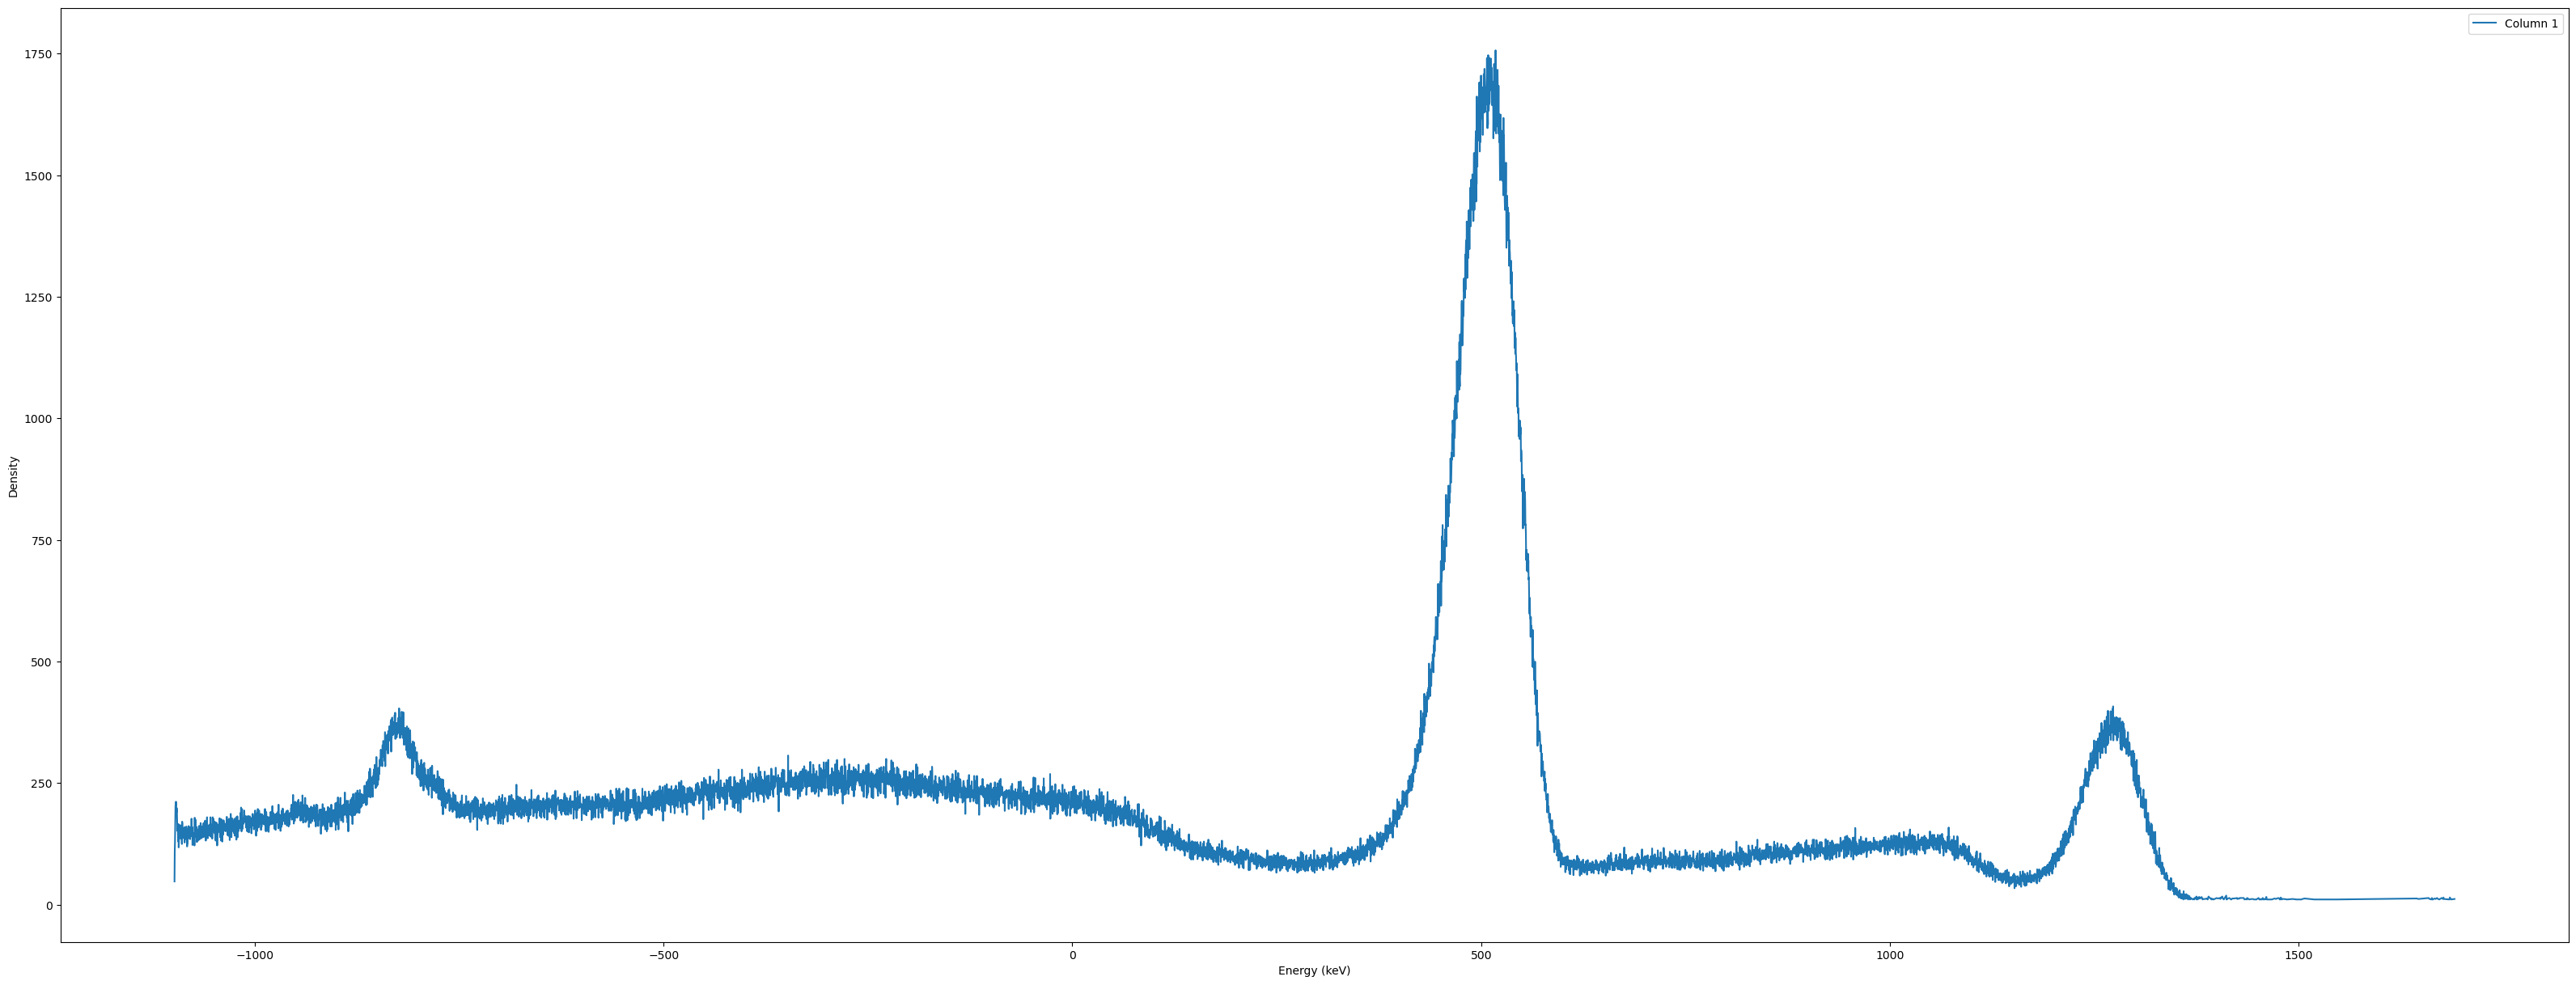

In [48]:
threshold = 11  # Set the threshold value

# Filter the counts based on the threshold
Na22_data_Filtered = Na22_data[Na22_data['Count'] >= threshold]

plt.figure(figsize=(40,15))
plt.plot(Na22_data_Filtered['Energy (keV)'], Na22_data_Filtered['Count'] ,label='Column 1')

plt.legend(loc='upper right')
plt.xlabel('Energy (keV)')
plt.ylabel('Density')

In [49]:
alt.data_transformers.disable_max_rows()

# Create the Altair chart
alt.Chart(Na22_data_Filtered).mark_line().encode(
    x='Energy (keV)',
    y='Count'
).interactive().properties(
    title='Energy vs. Count',
    width=800
)



alt.Chart(...)

In [50]:
threshold = 700  # Set the threshold value

# Filter the counts based on the threshold
Co60_data_Filtered = Co60_data[Co60_data['Count'] >= threshold]

# Create the Altair chart
alt.Chart(Co60_data_Filtered).mark_line().encode(
    x='Energy (keV)',
    y='Count'
).interactive().properties(
    title='Energy vs. Count',
    width=800
)

alt.Chart(...)

In [60]:
threshold = 10  # Set the threshold value

# Filter the counts based on the threshold
Ca137_data_Filtered = Ca137_data[Ca137_data['Count'] >= threshold]

# Create the Altair chart with log scale
alt.Chart(Ca137_data_Filtered).mark_line().encode(
    x='Energy (keV)',
    y=alt.Y('Count', scale=alt.Scale(type='log'))  # Set the y-axis scale to log
).interactive().properties(
    title='Energy vs. Count',
    width=800
)



alt.Chart(...)

In [51]:
# Constants
c = 299792458  # speed of light in m/s
m_e = 511  # rest mass of electron in keV/c²

# Energies of the photopeaks for Na-22
E_gamma_511 = 511  # in keV, from positron annihilation
E_gamma_1274 = 1274  # in keV, from nuclear transition

# Function to calculate T_max, the maximum kinetic energy transferable in Compton scattering
def calculate_t_max(E_gamma):
    return (2 * E_gamma ** 2) / (m_e + 2 * E_gamma)

# Calculate T_max for each photopeak
T_max_511 = calculate_t_max(E_gamma_511)
T_max_1274 = calculate_t_max(E_gamma_1274)

# Calculate the Compton edge energy for each photopeak
Compton_edge_511 = E_gamma_511 - T_max_511
Compton_edge_1274 = E_gamma_1274 - T_max_1274

Compton_edge_511, Compton_edge_1274


(170.33333333333331, 212.81922196796336)